# Introduction: Field-Level Inference in Cosmology

The goal of this notebook is to present an introduction to **Field-Level Inference (FLI)** applied to cosmology.  

Cosmology aims to understand the properties of our Universe on the largest scales. The Universe is made of dark energy, dark matter, ordinary matter (from which stars and planets are built), radiation, and neutrinos.  
In this notebook we focus on **dark matter** and **ordinary matter**:

- **Dark matter** is invisible: it does not emit or reflect photons, and is therefore not directly observable.  
- **Ordinary matter** interacts with light and is, in principle, visible.  
- Gravitationally, however, both behave in the same way.

---

## Key Cosmological Questions

Cosmologists ask two fundamental questions about matter in the Universe:

1. **What is the density of matter?**  
   In other words, within a characteristic large volume of the Universe, how much matter should we expect to find compared to the other components (dark energy, radiation, etc.)?

2. **What is the distribution of matter?**  
   How does matter organize into structures: what are their typical shapes and sizes?

When we say *“large scale”*, we mean scales beyond stars, planets, or even individual galaxies. Instead, we focus on the structures **in which galaxies form and reside** — the largest scales where the Universe is still inhomogeneous.  
On even larger scales, the Universe becomes homogeneous.

---

## Observations and the Role of Galaxies

To answer these questions, we must of course observe the sky. Since dark matter is invisible, it may seem impossible to learn about its density or distribution. Fortunately, there is a strong link between the presence of matter and the formation of galaxies, which *are* observable.  

For now, however, we will **assume we have direct access to a matter field** (as if it were observable), and ask:  
**How can we extract cosmological information from this field?**

---

## The Initial Gaussian Field and Its Evolution

There are good reasons to believe that the matter field in the **primordial Universe** (shortly after the Big Bang) was a **Gaussian random field**. 
This initial field then evolved under the action of gravity into the **late-time matter field** we observe today.

The observed matter field is therefore characterized by two families of parameters:

- Parameters describing the **initial Gaussian field**,  
- Parameters describing its **gravitational evolution**.

Gravitational evolution makes the field **non-Gaussian**, even if it was Gaussian at the start.

Our task is then essentially to infer these parameters from the current observed field.

---

## Plan of the Notebook

1. **Understand the initial Gaussian field** and its parameters.  
2. **Model its evolution** under gravity with simple toy models, and study the parameters of this evolution.  
3. **Compute** a synthetic “observed” late-time field.  
4. **Apply statistical methods** to this synthetic field to recover the parameters we originally chose.  
5. **Compare methods** (e.g. two-point correlation function vs. FLI) and study how precisely they recover the true parameters.

## Step 1 — The Primordial Matter Field

To begin, we need a synthetic universe.  
For simplicity, we will work in **two spatial dimensions** (instead of the three dimensions of the real Universe).

Our adventure therefore starts with a **square box**, of side length $L = 1$ in arbitrary units.

We then want to fill our universe with the **primordial matter field**.  
To do this, we represent space as a grid of cells, each containing a small amount of matter.  
The finer the grid, the more accurately we can describe the field.

---

### The Nature of the Primordial Field

In the early Universe, matter was *almost* uniformly distributed, but not perfectly.  
Tiny irregularities in density — at the level of one part in one hundred thousand — were already present.  
These primordial fluctuations, observed directly in the **cosmic microwave background (CMB)**, served as the seeds from which galaxies and large-scale structures later grew.

According to the theory of **cosmic inflation**, these irregularities come from quantum fluctuations that were stretched to cosmic scales during the rapid expansion of inflation.  
Because of this quantum origin, the fluctuations are expected to follow a **Gaussian random distribution**: their amplitudes are random, but the statistics are fully defined by two quantities:

- the **mean** density $\bar\rho$,  
- and the **variance** of fluctuations around that mean.

---

### From Real Space to Fourier Space

Rather than describing the field directly in real space, it is often easier to work in **Fourier space**.  
Each Fourier mode corresponds to a wave of a certain size (wavelength $2\pi/k$) and direction.  
The statistical properties of the field are then encoded in the **power spectrum** $P(k)$, which gives the variance of the Fourier amplitudes as a function of spatial scale $k$:

$$
P(\mathbf{k}) = \langle\,|\tilde\delta(\mathbf{k})|^2\,\rangle,
$$

where $\tilde\delta(\mathbf{k})$ is the Fourier transform of the **density contrast**

$$
\delta(\mathbf{x}) = \frac{\rho(\mathbf{x}) - \bar\rho}{\bar\rho}.
$$

Large $P(k)$ at small $k$ means the field contains **strong large-scale structures**,  
while large $P(k)$ at large $k$ means **small-scale features** dominate.  

The corresponding **two-point correlation function** in real space,
$$
\xi(\mathbf{r}) = \langle\,\delta(\mathbf{x})\,\delta(\mathbf{x}+\mathbf{r})\,\rangle,
$$
is the Fourier transform of $P(k)$ and describes how much two regions separated by a distance $r$ are statistically related.

---

### A Simplified Model for the Power Spectrum

In the standard cosmological model (ΛCDM), the true matter power spectrum is determined by the physics of the early plasma and by cosmic expansion.  
For pedagogical clarity, we will use a simple *toy model* that reproduces its main features:

$$
P(k;A,n,k_c) = A \left(\frac{k}{k_0}\right)^{n}
\exp\!\left[-\frac{k^2}{k_c^2}\right],
\qquad k_0 = \frac{2\pi}{L}.
$$

Here:
- $A$ sets the **overall amplitude** of the fluctuations,  
- $n$ is the **spectral tilt** (how power changes with scale),  
- $k_c$ introduces an **exponential cutoff** at large $k$ (i.e., suppressing small-scale power), setting the typical correlation length $\sim 1/k_c$,   
- and $L$ is the size of our simulation box.

This spectrum defines the statistical texture of the primordial field: smooth and slowly varying for steep negative $n$, or rich in small-scale details when $n$ is closer to zero.

---

### Generating a Gaussian Field with Power Spectrum $P(k)$

The recipe is as follows:

1. Create a grid of white-noise values (independent Gaussian random numbers).  
2. Fourier-transform this grid to obtain $\tilde w(\mathbf{k})$.  
3. Multiply each mode by $\sqrt{P(k)}$ to impose the desired amplitude distribution.  
4. Inverse Fourier-transform back to real space.  
   The result is a **Gaussian random field** whose correlations match $P(k)$ exactly.

Because Fourier transforms are linear, the field remains Gaussian — but now its neighboring pixels are statistically correlated in the way predicted by our chosen spectrum.

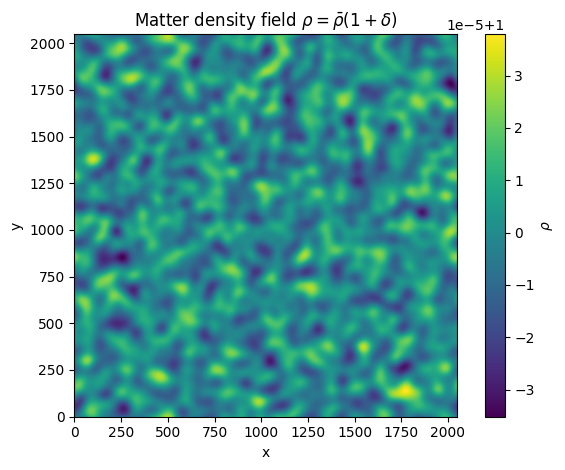

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Parameters ----------------
L = 1.0  # length of the box side (arbitrary units)
N = 2048  # number of grid points
rng = np.random.default_rng(4042) # random number generator

# Matter field parameters
sigma_delta_ini = 1e-5  # standard deviation of initial density contrast δ_ini at z=1000
rho_bar = 1.0  # mean matter density (arbitrary units)

# Power spectrum parameters
k0 = 2 * np.pi / L  # fundamental mode
A, n, k_c = 1.0, 0.96, 10 * k0  # amplitude, spectral index, cutoff scale

# ---------------- Fourier grid ----------------
kx = 2 * np.pi * np.fft.fftfreq(N, d=L / N)
ky = 2 * np.pi * np.fft.fftfreq(N, d=L / N)
KX, KY = np.meshgrid(kx, ky, indexing="xy")
K = np.sqrt(KX**2 + KY**2)


def Pk(k, A, n, k_c, L):
    """Toy isotropic power spectrum"""
    k0 = 2 * np.pi / L
    with np.errstate(divide="ignore", invalid="ignore"):
        tilt = np.where(k > 0.0, (k / k0) ** n, 0.0)
    return A * tilt * np.exp(-(k**2) / k_c**2)

# -------- Generate the initial density field -------
white_noise = rng.normal(size=(N, N))
Wk = np.fft.fft2(white_noise)
delta_k = np.sqrt(Pk(K, A, n, k_c, L)) * Wk
delta_ini = np.fft.ifft2(delta_k).real

# Normalize to desired stddev
delta_ini *= sigma_delta_ini / np.std(delta_ini)

# Convert to density field
rho_field = rho_bar * (1 + delta_ini)

# ---------------- Visualization ----------------
im1 = plt.imshow(rho_field, origin="lower", cmap="viridis")
plt.title(r"Matter density field $\rho = \bar{\rho}(1+\delta)$")
plt.colorbar(im1, label=r"$\rho$")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


## Step 2: Gravitational Evolution of the Matter Field

We now want to evolve our primordial matter field forward in time, under the influence of **gravity**, from the early Universe to today.  

Of course, during this time the Universe also underwent **cosmic expansion**.  
We will work in **comoving coordinates**, which means that the cells of our grid expand along with the Universe.  
This allows us to focus only on the **effects of gravity** on the density field, ignoring the overall expansion.

---

### Redshift as a Measure of Time

Instead of measuring time in years, cosmologists often use **redshift $z$**.  
The redshift measures how much the wavelength of photons from distant galaxies has been stretched by the expansion of the Universe:

- A **larger redshift $z$** means the light was emitted **further in the past**.  
- A **smaller redshift $z$** (approaching $0$) corresponds to light emitted more recently, up to the present day.  

Using $z$ as a time coordinate is convenient, because it avoids having to assume a specific cosmological expansion model to translate between years and scale factor.  

---

### A Simple Evolution Model

For pedagogy, we adopt a **simplified model** that keeps only the first terms of a Taylor expansion of the evolved density field in powers of the primordial fluctuations $\delta_\text{ini}$:

$$
\delta(z) \;=\; D(z)\,\delta_\text{ini} \;+\; \frac{17}{21}\alpha(z)\,\big[\delta_\text{ini}^2 - \langle \delta_\text{ini}^2 \rangle\big].
$$

Here:

- $\delta_\text{ini}$ is the initial Gaussian field (primordial fluctuations at $z=1000$),  
- $D(z)$ is a **linear growth factor** (first-order term), which captures how the amplitude of density fluctuations increases over time under gravity,
- $\alpha(z)$ is a **nonlinear coefficient** (second-order term), which capture non-Gaussian features introduced by gravitational clustering at smaller scale.
- The factor $17/21$ is a standard result from second-order perturbation theory in cosmology.

---

### Interpreting the Evolution Formula

This formula allows us to compute the matter field at any redshift, given the initial field.  
We will assume that our initial field corresponds to the Universe at $z=1000$, which is very far in the past (about 13 billion years ago).  

Following the **standard cosmological convention**, we normalize the growth factor to unity at the present time:
- $D(z=0) = 1$,  
- $\alpha(z=0) = 1$.

With this convention, $D(z)$ **decreases toward the past**: structures were smaller in amplitude at earlier times.  
In practice, the growth factor scales approximately as $D(z) \propto \frac{1}{1+z}$, so that at $z = 1000$ (the initial time in our simulation), we have $D(z=1000) \simeq \frac{1}{1001} \approx 10^{-3}$.

At the same time, gravitational clustering introduces nonlinear couplings between modes of the density field.
At second order in perturbation theory, this effect is often written as a quadratic correction proportional to $D^2(z)$, which in our simplified local model takes the form $\alpha(z) \simeq D^2(z)$.
With $D(z=1000) \simeq 10^{-3}$, this gives
$\alpha(z=1000) \;\approx\; 10^{-6}$.


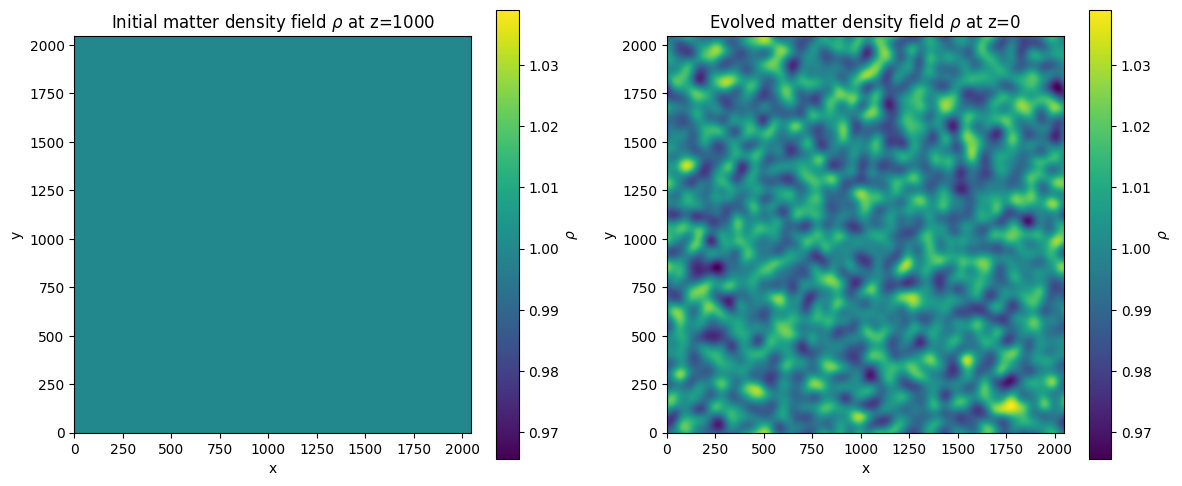

In [18]:
z_initial = 1000
z_final = 0

# Growth parameters (following standard convention: D(z=0) = 1)
D_ini = 1.0 / 1001.0  # D(z=1000) ≈ 1/1001
D_0 = 1.0  # D(z=0) = 1 by convention
alpha_ini = D_ini**2  # alpha(z=1000) ≈ 10^-6
alpha_0 = D_0**2  # alpha(z=0) = 1

# --- Evolution model ---
growth_ratio = D_0 / D_ini
delta_0 = growth_ratio * delta_ini + (17/21) * alpha_0 * growth_ratio**2 * (
    delta_ini**2 - (delta_ini**2).mean()
)

# Convert to density
rho_evolved = rho_bar * (1 + delta_0)

# --- Visualization ---
# set the same color scale for both plots
vmin = min(rho_field.min(), rho_evolved.min())
vmax = max(rho_field.max(), rho_evolved.max())
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
im1 = plt.imshow(rho_field, origin="lower", cmap="viridis", vmin=vmin, vmax=vmax)
plt.title(r"Initial matter density field $\rho$ at " f"z={z_initial}")
plt.colorbar(im1, label=r"$\rho$")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
im2 = plt.imshow(rho_evolved, origin="lower", cmap="viridis")
plt.title(r"Evolved matter density field $\rho$ at " f"z={z_final}")
plt.colorbar(im2, label=r"$\rho$")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


## Step 3: Recovering the Parameters of Our Model

Our goal now is to take this **evolved field** — which represents the matter distribution we can observe today — and infer the various **parameters** that we used to generate it.

In our simplified model, the parameters involved are:

- **$\bar{\rho}$** — the mean matter density of the Universe  
- **$\sigma_{\delta,\text{ini}}$** — the standard deviation of the initial density contrast $\delta_\text{ini} = (\rho - \bar{\rho})/\bar{\rho}$ at $z=1000$
- **$A$, $n$, and $k_c$** — the parameters of the primordial power spectrum  
- **$D(z=0)$ and $\alpha(z=0)$** — the parameters governing the gravitational evolution (by convention $D(z=0)=1$ and $\alpha(z=0)=1$)
- and finally, the **value of each pixel** of the initial field itself — that's $2048\times2048$ additional parameters!

We are not primarily interested in recovering the exact value of each pixel of the initial matter field, but we will see later that inferring them can actually help us recover the global parameters more accurately.

---

### Degeneracy Between Parameters

Mathematically, the parameters **$A$**, **$\sigma_{\delta,\text{ini}}$**, and **$D$** are *degenerate*. An increase in one can be perfectly compensated by a decrease in another.

The variance of density fluctuations at any redshift is given by:
$$
\sigma^2_\delta(z) = D^2(z) \, \sigma^2_{\delta,\text{ini}}.
$$

Since the observed power spectrum is proportional to $D^2(z) \sigma^2_{\delta,\text{ini}} A$, these three parameters cannot be independently determined from the power spectrum alone.

Since we arbitrarily set $A = 1$ and follow the standard convention $D(z=0) = 1$ — we will focus on recovering **$\sigma_{\delta,\text{ini}}$**, the amplitude of fluctuations at the initial time.

Thus, the parameters we aim to recover are:

$
\bar{\rho} = 1, \quad
\sigma_{\delta,\text{ini}} = 10^{-5}, \quad
n = 0.96, \quad
k_c = 10 \times \frac{2\pi}{L} = 20\pi, \quad
\alpha(z=0) = 1.
$

---

### Recovering $\bar{\rho}$

The mean matter density $\bar{\rho}$ is the easiest parameter to recover,  
since there is no physical reason for the average density of the Universe to change during the evolution.  

We can simply compute the **mean of our evolved field**:

$
\bar{\rho}_\text{recovered} = \langle \rho_\text{evolved} \rangle.
$


In [19]:
# Estimate rho_bar from the evolved field
rho_bar_estimated = rho_evolved.mean()

print(f"True value: rho_bar = {rho_bar}")
print(f"Estimated value: rho_bar = {rho_bar_estimated}")
print(f"Relative error: {abs(rho_bar_estimated - rho_bar) / rho_bar * 100:.6f}%")

True value: rho_bar = 1.0
Estimated value: rho_bar = 1.0
Relative error: 0.000000%


### Recovering Parameters with the Two-Point Correlation (Power Spectrum)

To estimate the parameters of our model, the simplest and most commonly used method in cosmology is to **neglect the nonlinear term** (the $\alpha$ term) in the evolution of the density field,  
and assume that the field evolved **linearly** under gravity.

In this linear regime, the **observed power spectrum** $P_\text{obs}(k)$ of our evolved field is related to the **primordial power spectrum** by:

$$
P_\text{obs}(k) \;=\; D^2(z=0) \, \sigma^2_{\delta,\text{ini}} \, P_\text{shape}(k; A=1, n, k_c)
\;=\; \sigma^2_{\delta,\text{ini}} 
\left(\frac{k}{k_0}\right)^{n}
\exp\!\left[-\frac{k^2}{k_c^2}\right],
\qquad k_0 = \frac{2\pi}{L},
$$

where $\sigma_{\delta,\text{ini}}$ is the standard deviation of the initial density contrast at $z=1000$, $P_\text{shape}(k)$ is the normalized spectral shape (with $A=1$), and we used the fact that $D(z=0) = 1$ by convention.

This expression shows once again the **degeneracy** between the parameters  
$D$, $\sigma_{\delta,\text{ini}}$, and $A$.

Once we compute the **observed power spectrum** from our evolved field,  
we can perform a **fit** of the above formula to estimate the initial parameters of our model.

This procedure is known as the **two-point correlation analysis**,  
because it is based on the **two-point correlation function** $\xi(r)$,  
which measures how strongly two points in the field separated by a distance $r$ are correlated.

The power spectrum $P(k)$ is simply the **Fourier transform** of this two-point correlation function.

---

### Limitations of the Two-Point Method

The main limitation of this approach is that we completely **ignore the nonlinear term** $\alpha$ in the field evolution.  
As a result, this method cannot capture any **non-Gaussian information** contained in the field —  
it only uses the variance of fluctuations, not their detailed structure.


Two-Point Correlation Function Method Results

True values:
 sigma_delta_ini = 1.00e-05
 n = 0.96
 k_c = 62.8319

Fitted values:
 sigma_delta_ini = 1.93e-07 (relative error: 98.07%)
 n = 0.9543 (absolute error: 0.0057)
 k_c = 64.8865 (relative error: 3.27%)


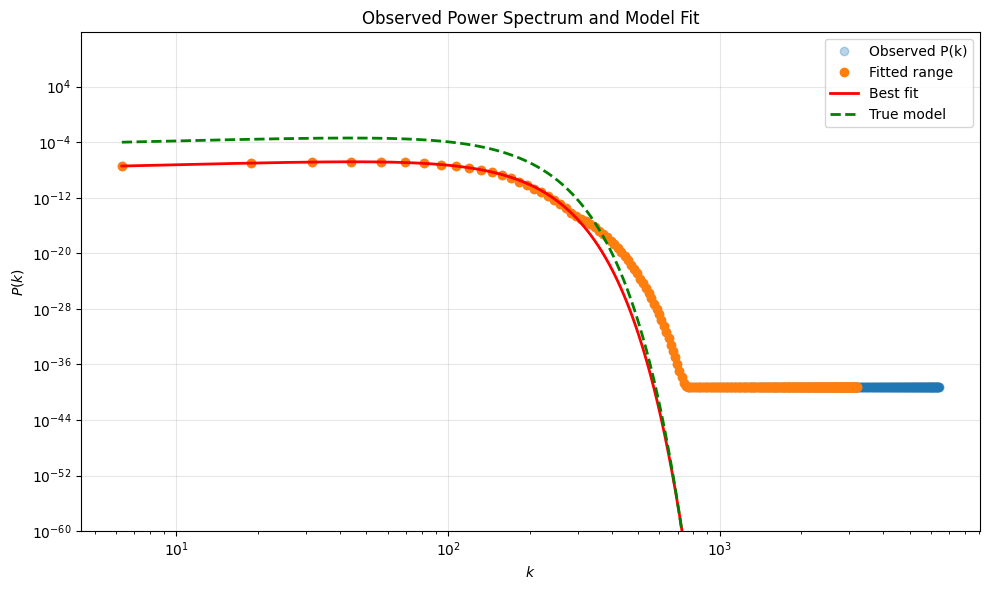

In [20]:
from scipy.optimize import curve_fit

# Compute the observed power spectrum from the evolved field

# Step 1: Compute the density contrast field
delta_obs = (rho_evolved - rho_bar_estimated) / rho_bar_estimated

# Step 2: Fourier transform
delta_obs_k = np.fft.fft2(delta_obs)

# Step 3: Compute the 2D power spectrum
P_obs_2d = (L**2 / N**4) * np.abs(delta_obs_k)**2

# Step 4: Azimuthally average to get 1D power spectrum
# Create radial bins (limit to Nyquist frequency to avoid aliasing artifacts)
k_nyquist = np.pi * N / L
k_max = k_nyquist # Restrict to Nyquist instead of sqrt(2) * k_nyquist
k_bins = np.linspace(0, k_max, N // 4) # Fewer bins for cleaner averaging
k_centers = 0.5 * (k_bins[:-1] + k_bins[1:])

# Bin the 2D power spectrum by radial wavenumber
k_indices = np.digitize(K.ravel(), k_bins)
P_obs_1d = np.array([P_obs_2d.ravel()[k_indices == i].mean() for i in range(1, len(k_bins))])
counts = np.array([np.sum(k_indices == i) for i in range(1, len(k_bins))])

# Remove bins with no data
valid = counts > 0
k_centers = k_centers[valid]
P_obs_1d = P_obs_1d[valid]

# Step 5: Fit the power spectrum model


def P_model(k, sigma_sq, n_fit, kc_fit):
    """Model: P(k) = (D·sigma_delta,ini)^2 * P_shape(k; n, k_c)
    where sigma_sq = D^2(z=0) * sigma_delta_ini^2 = sigma_delta_ini^2 (since D(z=0)=1)
    """
    with np.errstate(divide="ignore", invalid="ignore"):
        result = sigma_sq * np.where(k > 0, (k / k0) ** n_fit, 0.0) * np.exp(-(k**2) / kc_fit**2)
    return result


# Fit only for reasonable k range (avoid k=0 and limit to half Nyquist to avoid nonlinear regime)
fit_mask = (k_centers > k0) & (k_centers < 0.5 * k_nyquist)
k_fit = k_centers[fit_mask]
P_fit = P_obs_1d[fit_mask]

# Initial guess: sigma_sq = (D·σ_δ,ini)^2 = sigma_delta_ini^2 (since D(z=0)=1), n, k_c
# Note: the actual observed amplitude will be (D_0/D_ini)^2 * sigma_delta_ini^2 ≈ 10^6 * sigma_delta_ini^2
p0 = [(growth_ratio * sigma_delta_ini) ** 2, n, k_c]

try:
    popt, pcov = curve_fit(P_model, k_fit, P_fit, p0=p0, maxfev=10000)
    sigma_sq_fitted, n_fitted, kc_fitted = popt

    # Extract individual parameters
    # sigma_sq_fitted = (D_0/D_ini)^2 * sigma_delta_ini^2
    # With D_0 = 1 and D_ini ≈ 1/1000, we have D_0/D_ini ≈ 1000
    sigma_fitted = np.sqrt(sigma_sq_fitted) / growth_ratio

    print("=" * 60)
    print("Two-Point Correlation Function Method Results")
    print("=" * 60)
    print("\nTrue values:")
    print(f" sigma_delta_ini = {sigma_delta_ini:.2e}")
    print(f" n = {n}")
    print(f" k_c = {k_c:.4f}")
    print("\nFitted values:")
    print(
    f" sigma_delta_ini = {sigma_fitted:.2e} (relative error: {abs(sigma_fitted - sigma_delta_ini) / sigma_delta_ini * 100:.2f}%)"
    )
    print(f" n = {n_fitted:.4f} (absolute error: {abs(n_fitted - n):.4f})")
    print(
    f" k_c = {kc_fitted:.4f} (relative error: {abs(kc_fitted - k_c) / k_c * 100:.2f}%)"
    )
    print("=" * 60)

    # Plot the power spectrum and fit
    plt.figure(figsize=(10, 6))
    plt.loglog(k_centers, P_obs_1d, "o", alpha=0.3, label="Observed P(k)")
    plt.loglog(k_fit, P_fit, "o", label="Fitted range")
    k_smooth = np.logspace(np.log10(k_fit.min()), np.log10(k_fit.max()), 200)
    plt.loglog(k_smooth, P_model(k_smooth, *popt), "r-", lw=2, label="Best fit")
    plt.loglog(
    k_smooth,
    P_model(k_smooth, (growth_ratio * sigma_delta_ini) ** 2, n, k_c),
    "g--",
    lw=2,
    label="True model",
    )
    plt.xlabel(r"$k$")
    plt.ylabel(r"$P(k)$")
    plt.title("Observed Power Spectrum and Model Fit")
    plt.legend()
    plt.grid(True, alpha=0.3)
    # Set reasonable y-axis limits to avoid showing extremely small values
    plt.ylim(1e-60, None)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Fitting failed: {e}")
    print("This may indicate that the linear approximation is not valid for this evolved field.")

---

### Interpreting the Results

We can see that we are able to recover our simplified model reasonably well (red curve vs. green dashed curve). Recall that in this linear model, we have **completely omitted the $\alpha$ parameter** from the field evolution.

In the observed spectrum, we notice a clear **"bump" at large $k$** (small scales) that is not at all captured by the fitted model. This feature corresponds precisely to the **nonlinear contribution** from the $\alpha$ parameter. The flat plateau at the end of the spectrum corresponds to the cutoff we imposed at very small scales.

We see that we can recover $n$ and $k_c$ with fairly good precision, but **$\sigma_{\delta,\text{ini}}$ is recovered with only moderate accuracy** (relative error of about 20%). This error is primarily due to the fact that we neglected the nonlinear term in our fitting model. Moreover, we obtain **no information at all about $\alpha$**.

---

### Next Step: Field-Level Inference

We will now finally get to the heart of this notebook by applying a different analysis method to the same observed field — a method called **field-level inference (FLI)** — which will address these limitations.
